In [52]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data


In [27]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_11-07-2023_18-28-30-341/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_11-07-2023_18-28-30-341/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_11-07-2023_18-28-30-341/arena"
sr_agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)

# Train Sargolini on a Simple2D env

array([<Axes: title={'center': 'Eig1'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig10'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig15'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig20'}, xlabel='width', ylabel='depth'>],
      dtype=object)

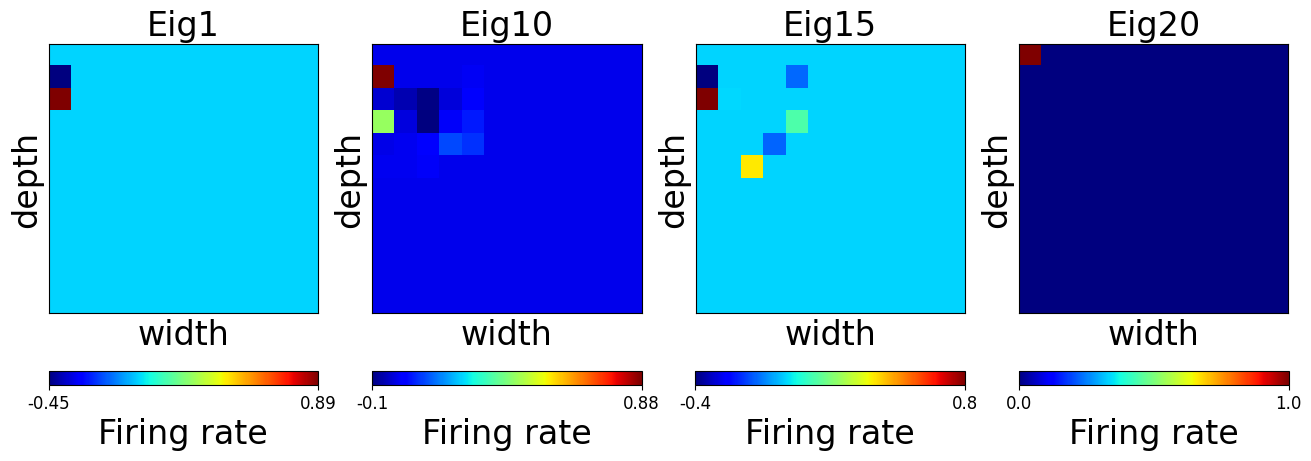

In [28]:
# Plot the saved variables
sr_agent.plot_eigen(sr_agent.srmat, eigen=[1,10,15,20],save_path=None)

array([<Axes: title={'center': 'Eig1'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig10'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig15'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig20'}, xlabel='width', ylabel='depth'>],
      dtype=object)

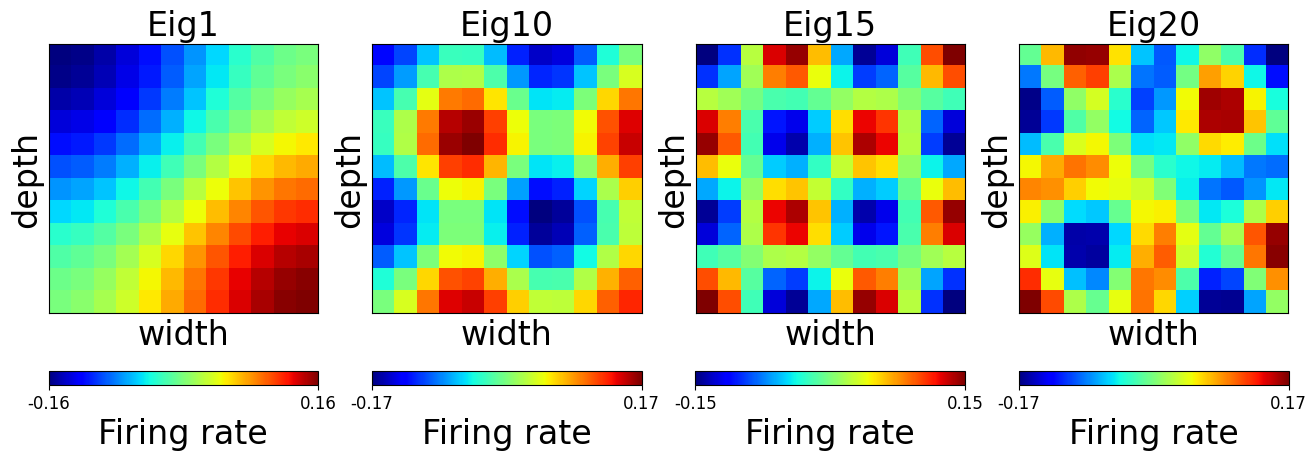

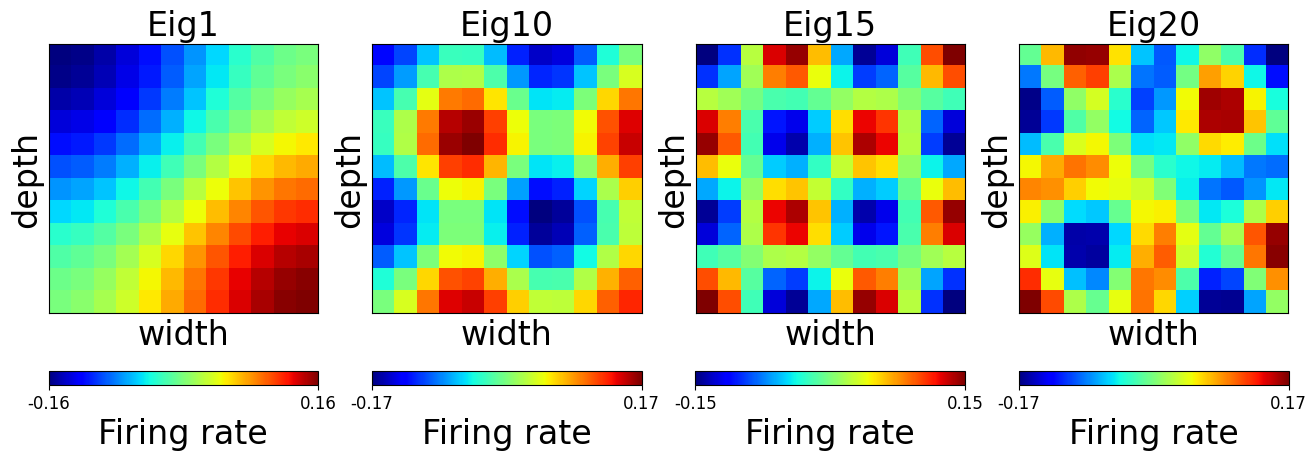

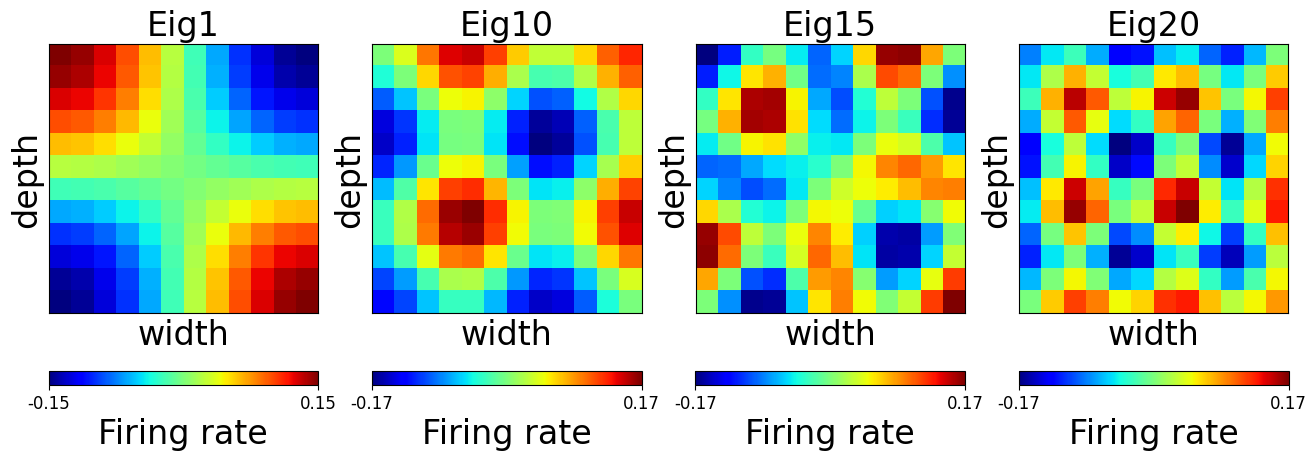

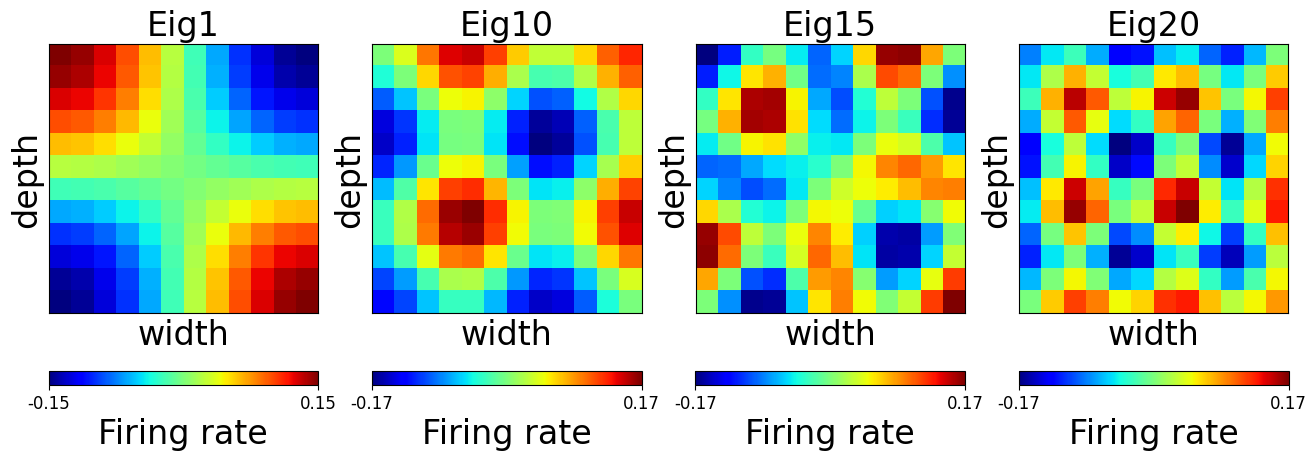

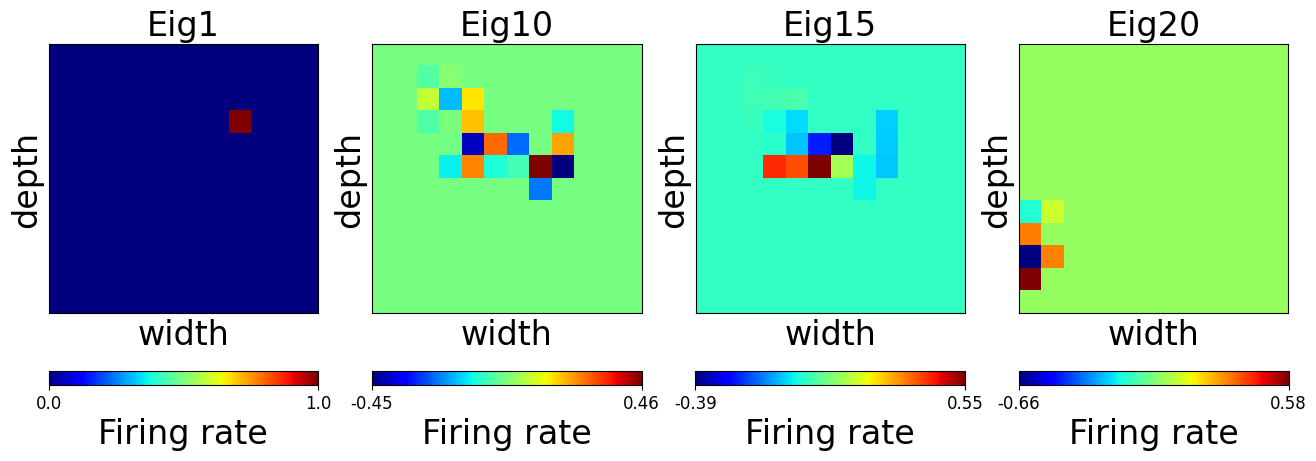

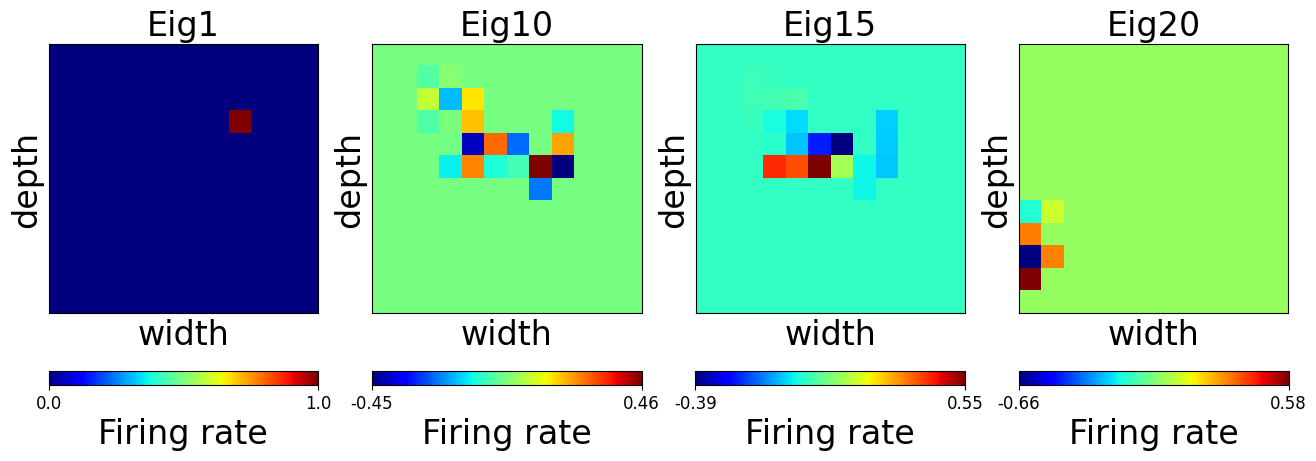

In [29]:
#Then do additonal runs
sr_sum = sr_agent.successor_rep_sum()
sr_agent.plot_eigen(sr_agent.srmat_sum, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(sr_sum, eigen=[1,10,15,20],save_path=None)

srmat_ground=sr_agent.successor_rep_solution()
sr_agent.plot_eigen(sr_agent.srmat_ground, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(srmat_ground, eigen=[1,10,15,20],save_path=None)

sr_td = sr_agent.update_successor_rep_td_full(param['training_loop_params']['t_episode'],param['training_loop_params']['n_episode']) # Compute the successor representation matrix using TD learning
sr_agent.plot_eigen(sr_agent.srmat_full_td, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(sr_td, eigen=[1,10,15,20],save_path=None)



array([<Axes: title={'center': 'Eig1'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig10'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig15'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig20'}, xlabel='width', ylabel='depth'>],
      dtype=object)

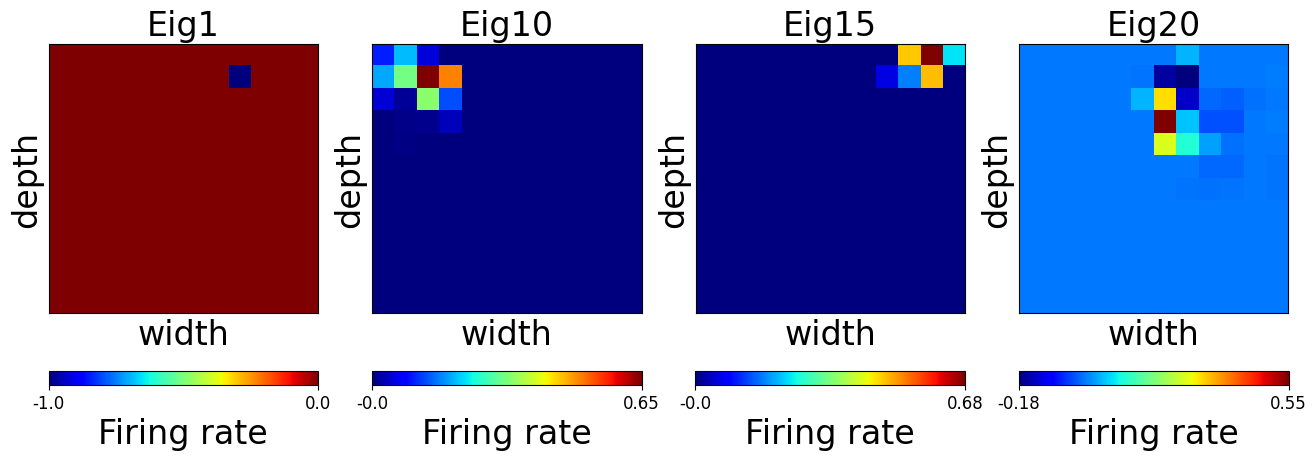

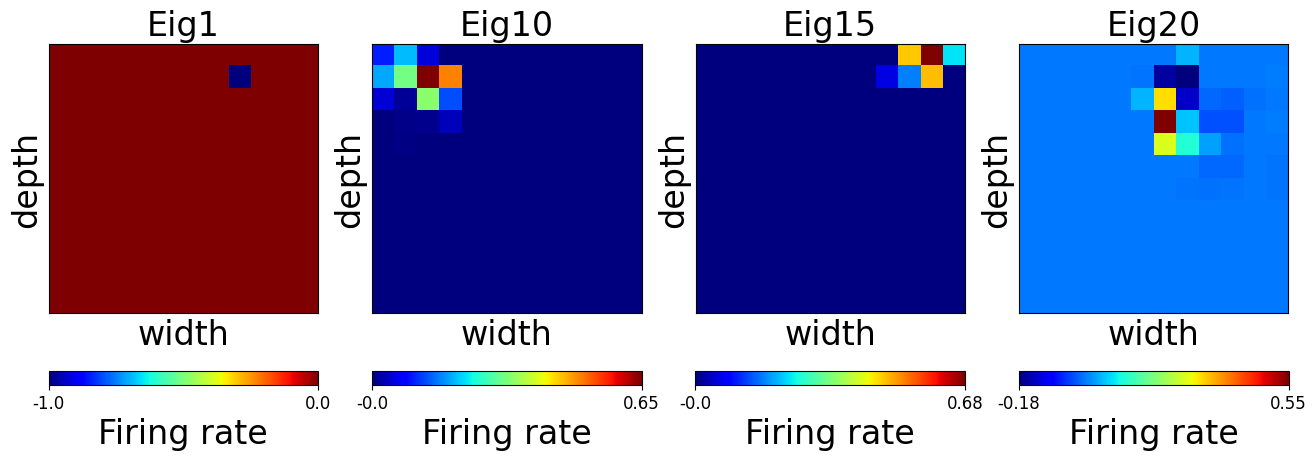

In [30]:
# Then do TD runs with the new external parameters
sr_td = sr_agent.update_successor_rep_td_full(10,20) # Compute the successor representation matrix using TD learning
sr_agent.plot_eigen(sr_agent.srmat_full_td, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(sr_td, eigen=[1,10,15,20],save_path=None)



  0%|          | 0/10 [00:00<?, ?it/s]

hello


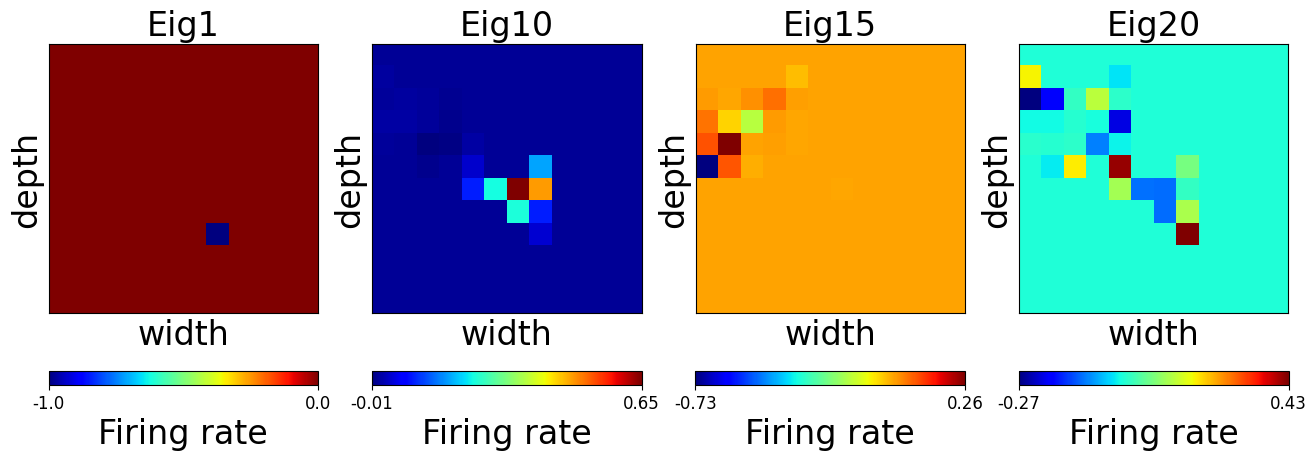

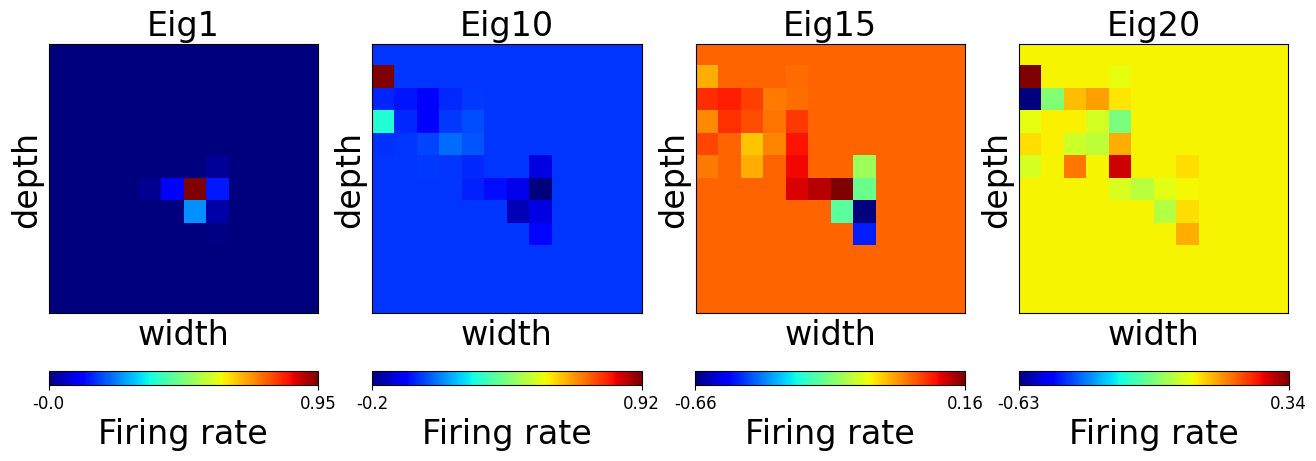

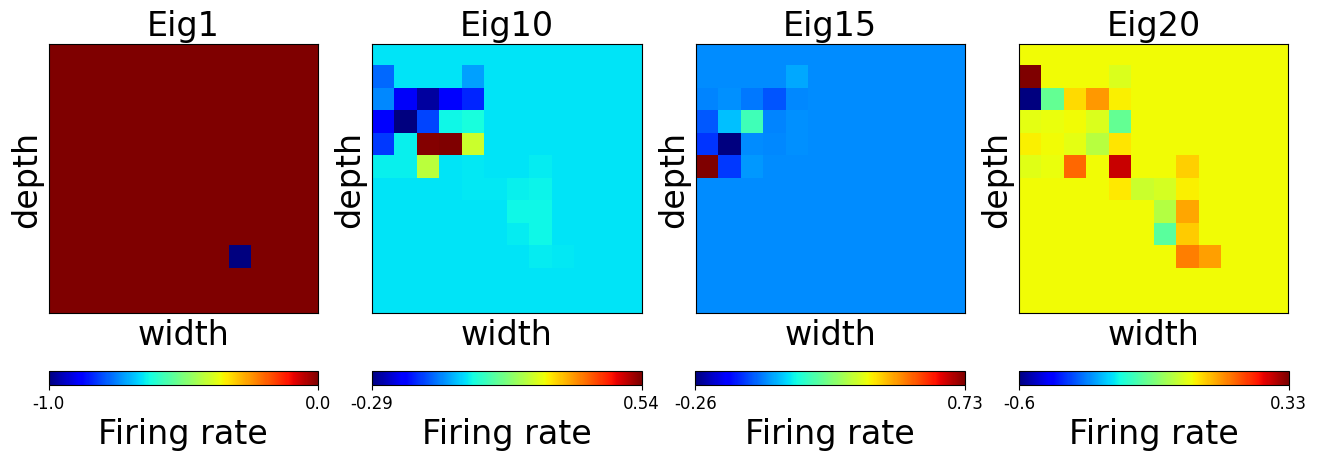

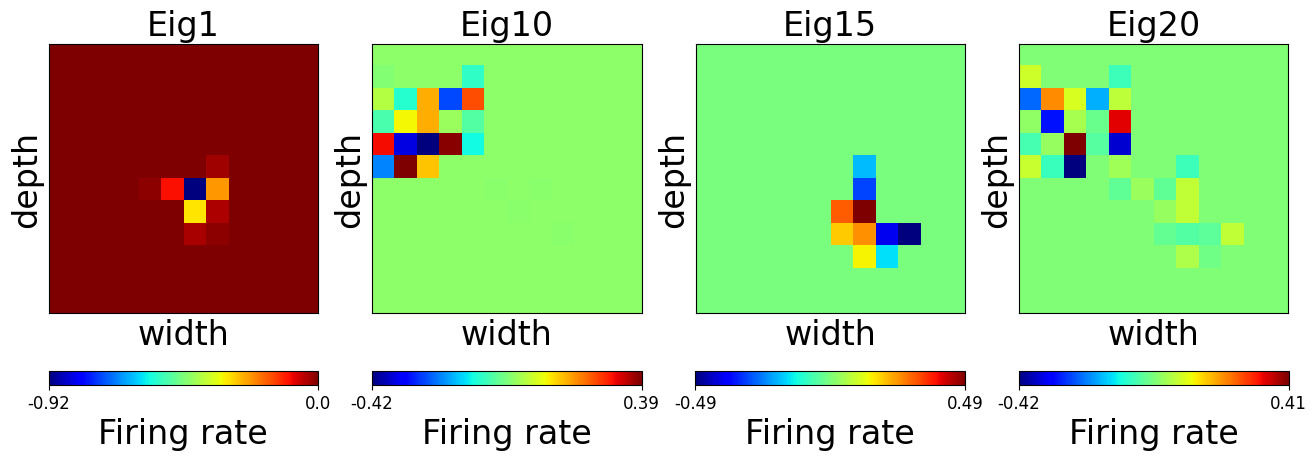

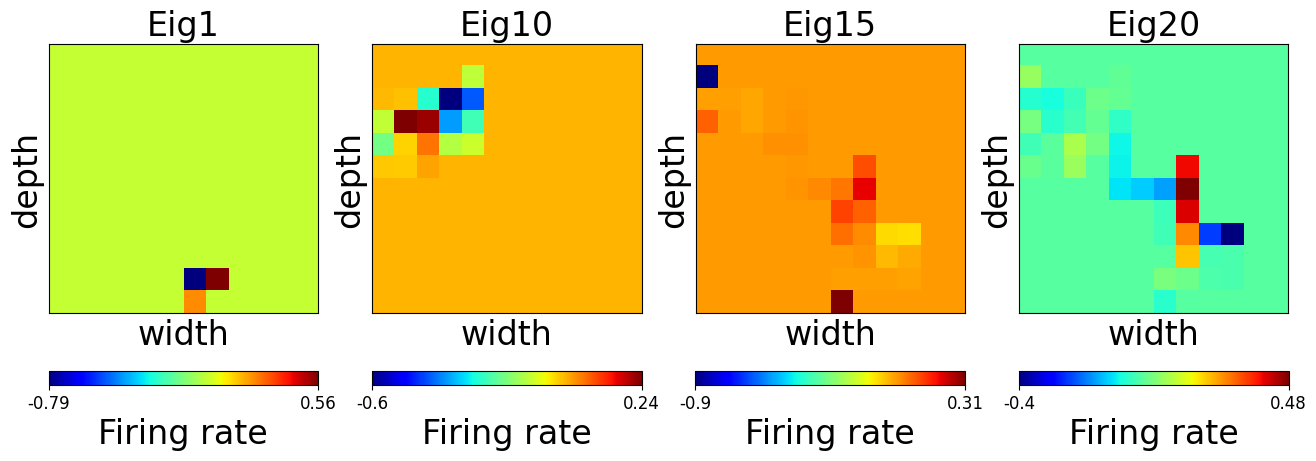

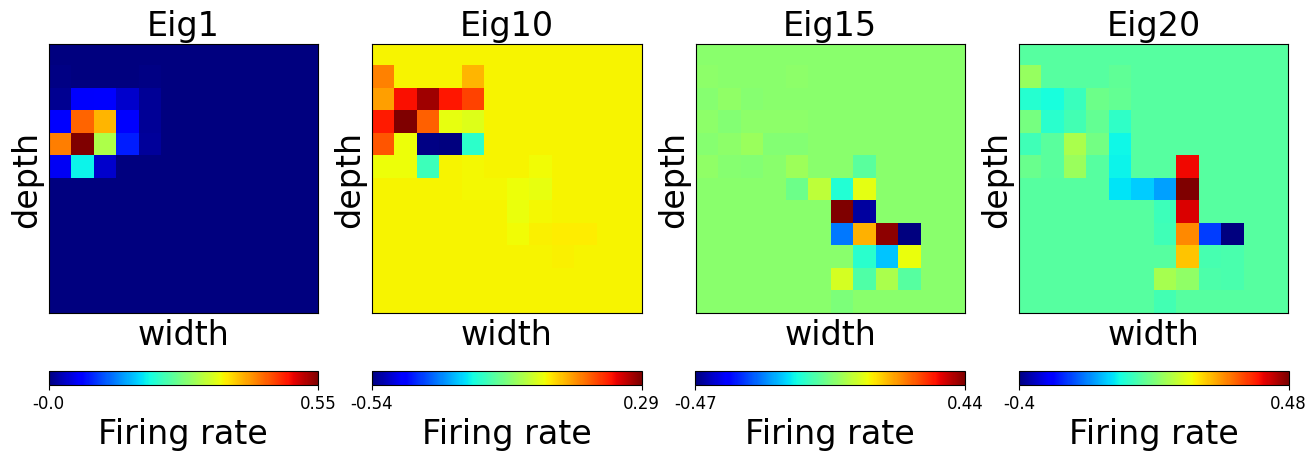

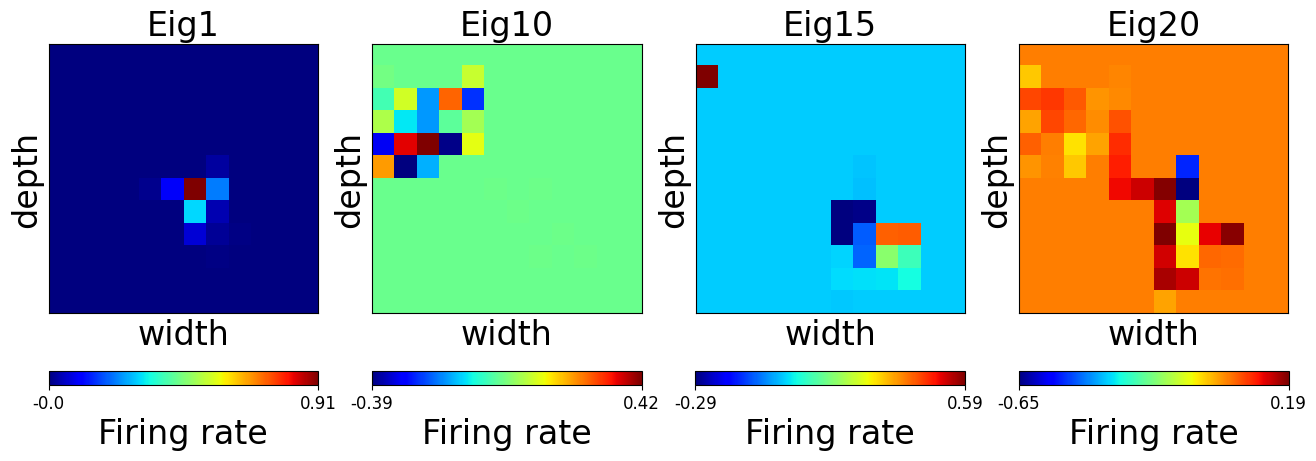

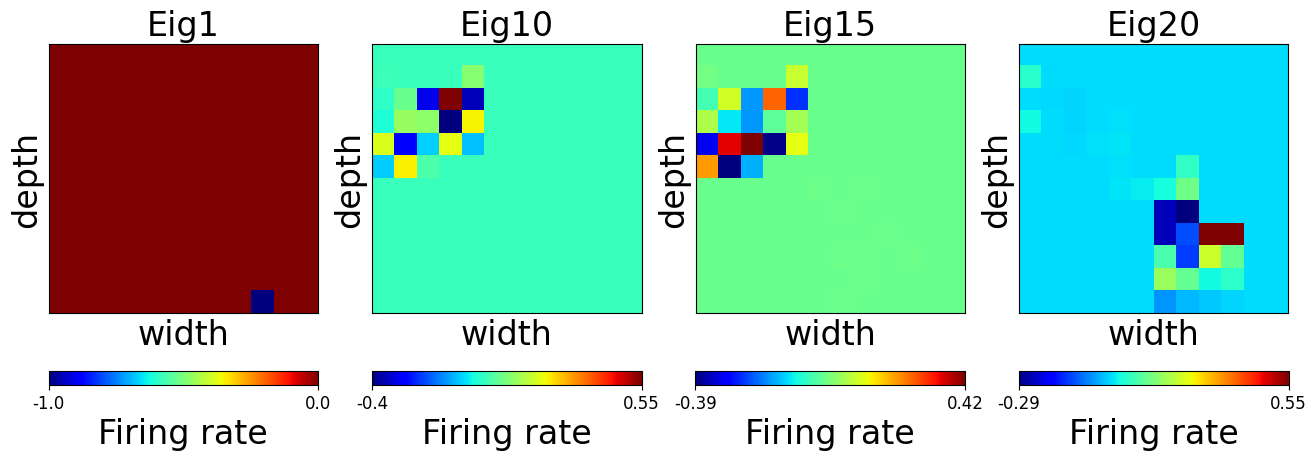

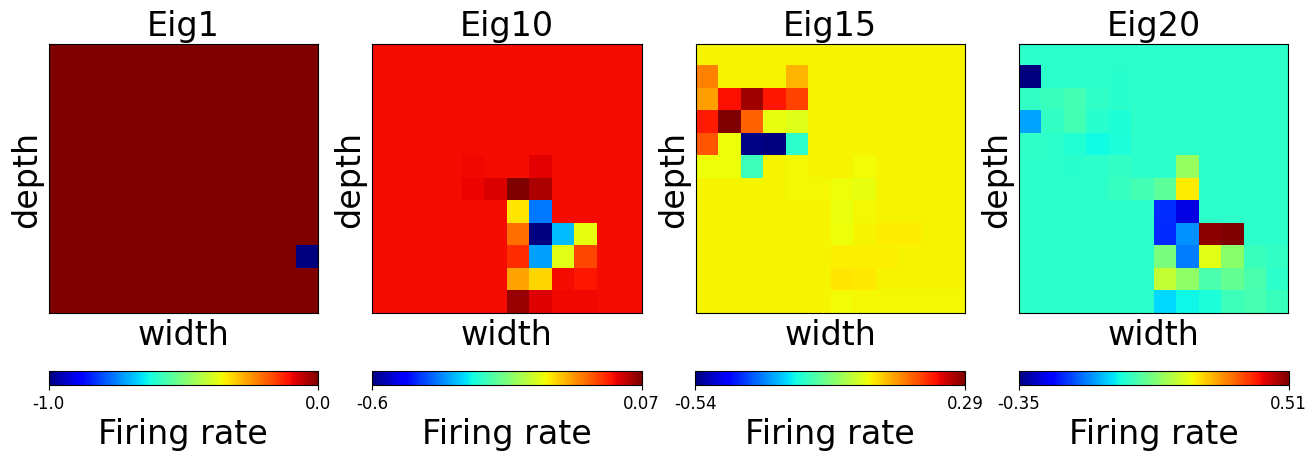

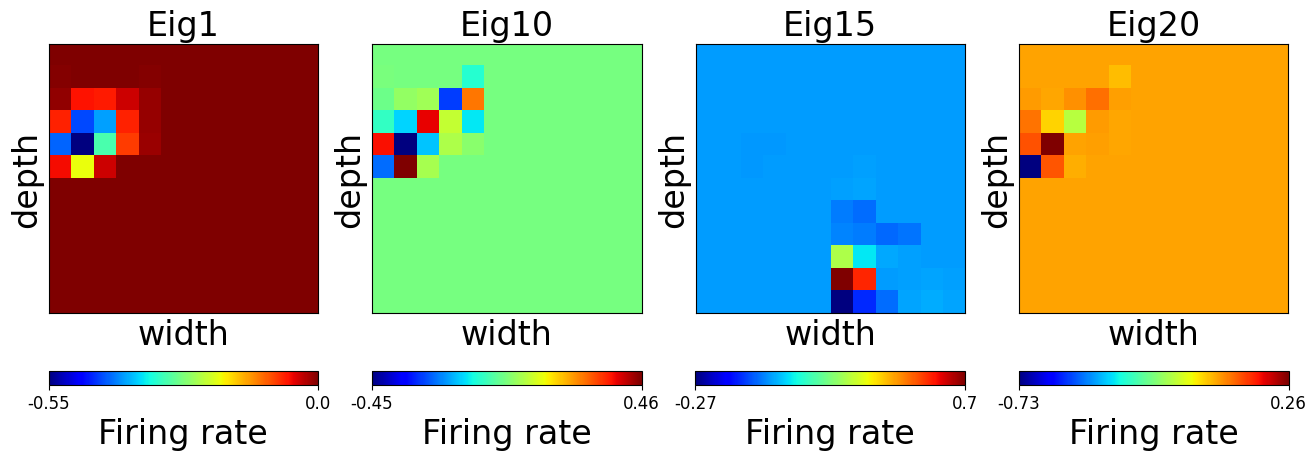

In [31]:
# etc etc
env = pd.read_pickle(arena_path)

# Now re-run in this loop fasion
plot_every = 10
total_iters = 0
obs, state = env.reset()
for i in tqdm(range(param['training_loop_params']['n_episode'])):
    for j in range(param['training_loop_params']['t_episode']):
        action = sr_agent.act(obs)  # the action is link to density of state to make sure we always land in a new
        K  = sr_agent.update()
        obs, state, reward = env.step(action)
        obs = obs[:2]
        total_iters += 1
        if total_iters % plot_every == 0:
            sr_agent.plot_eigen(K, eigen=[1,10,15,20],save_path='./sr.png')
# If we want to re-run it

print('hello')

# Train Sargolini on a Sargolini 2006

In [32]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_4_11-07-2023_18-28-30-342/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_4_11-07-2023_18-28-30-342/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_4_11-07-2023_18-28-30-342/arena"
sr_agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)


array([<Axes: title={'center': 'Eig1'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig10'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig15'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig20'}, xlabel='width', ylabel='depth'>],
      dtype=object)

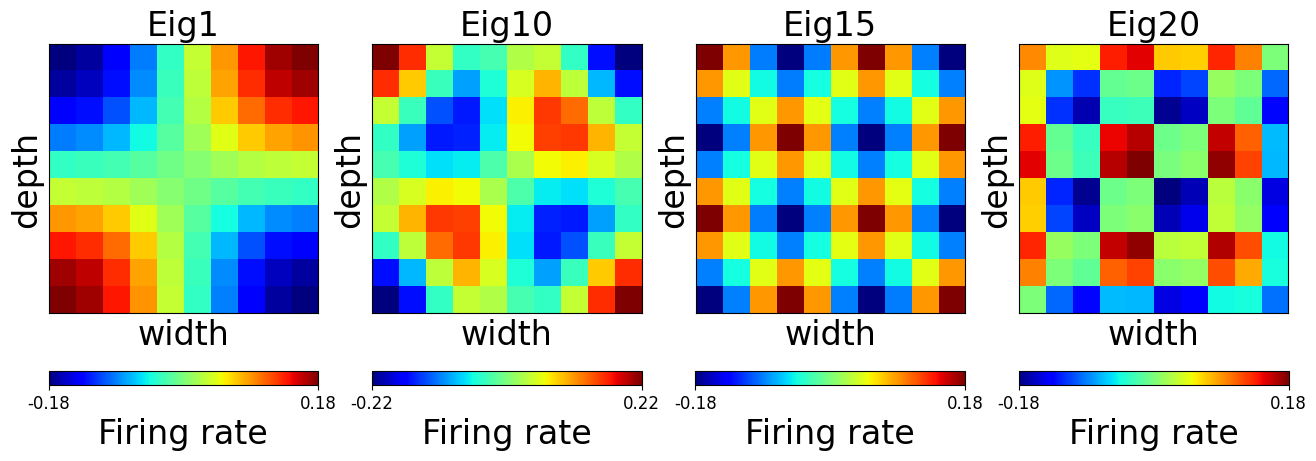

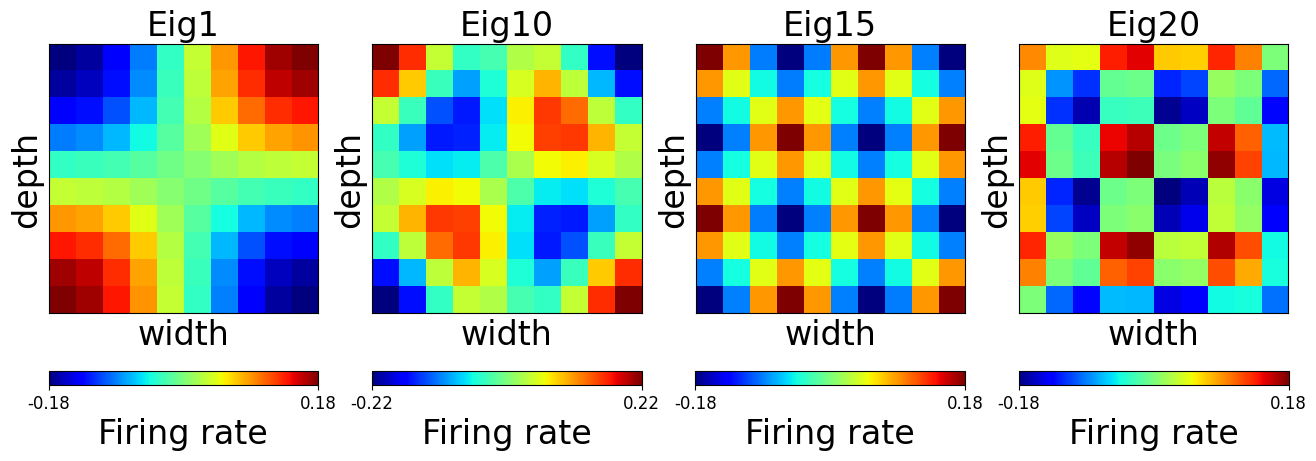

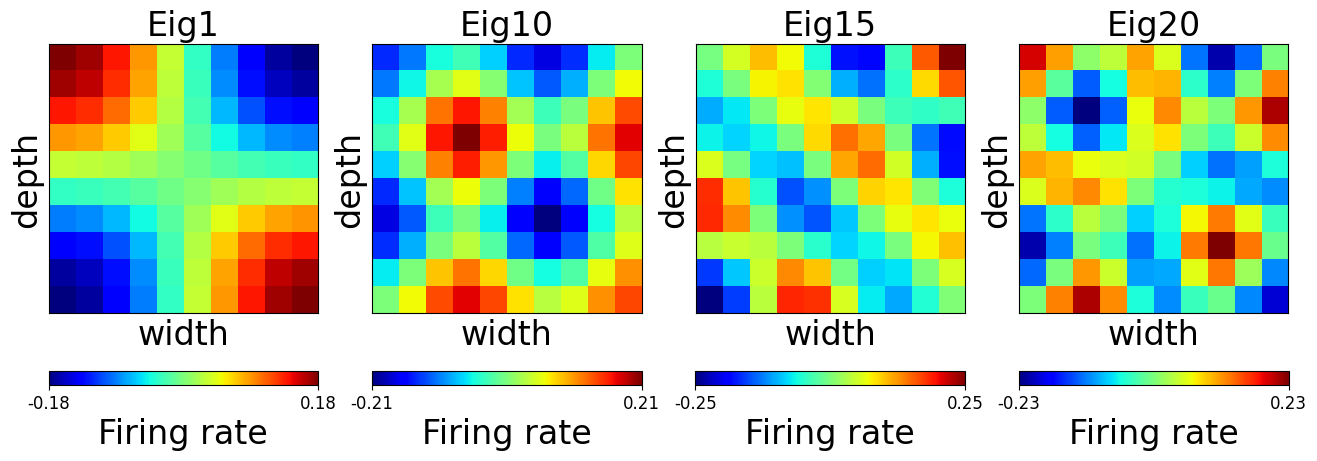

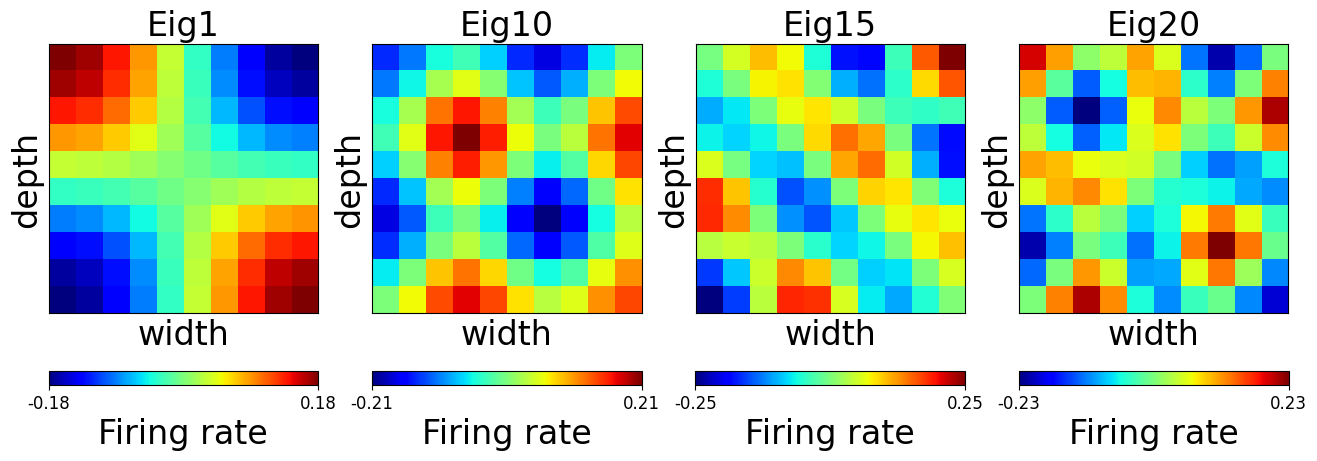

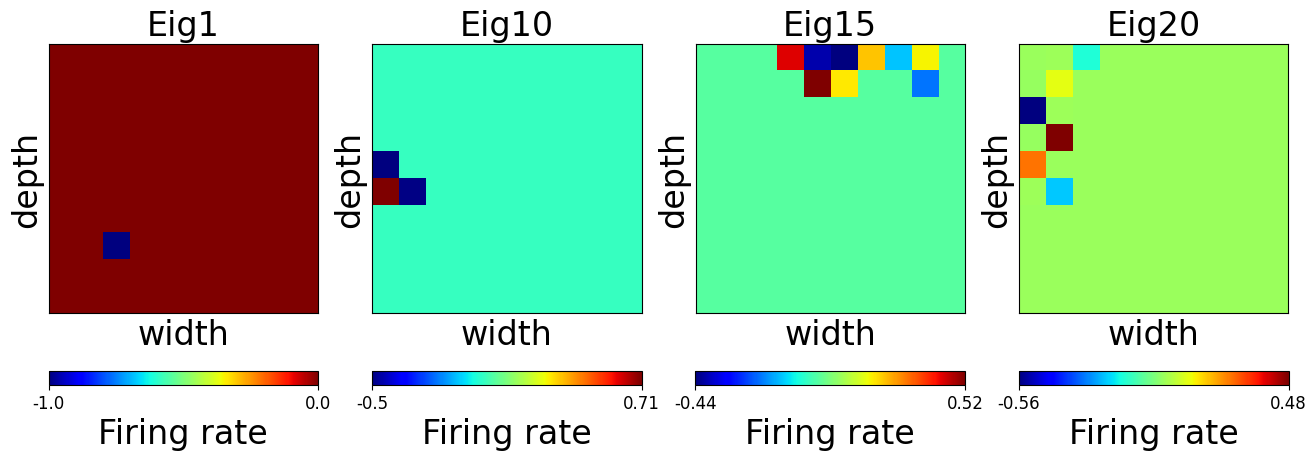

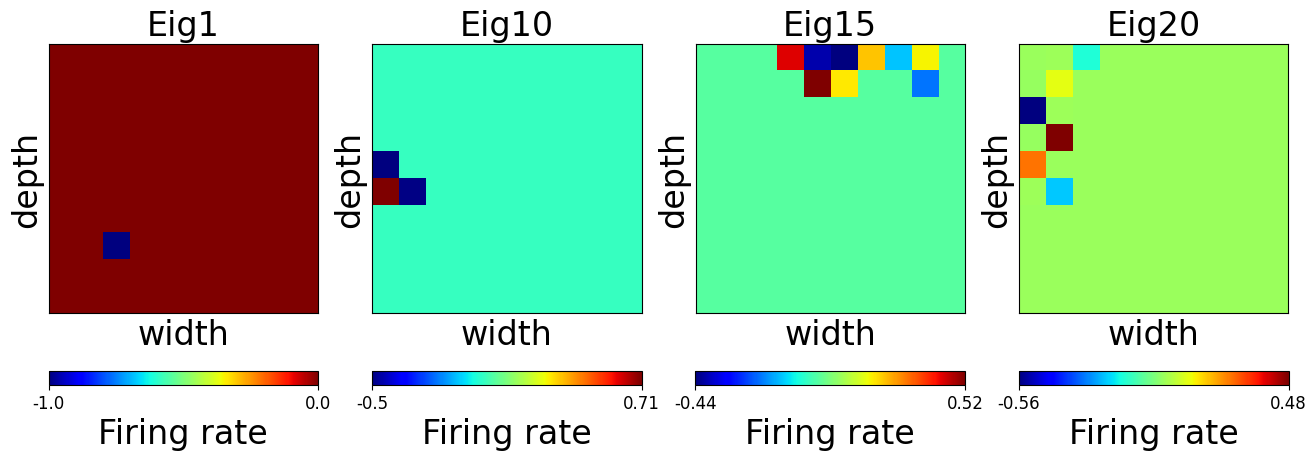

In [33]:
#Then do additonal runs
sr_sum = sr_agent.successor_rep_sum()
sr_agent.plot_eigen(sr_agent.srmat_sum, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(sr_sum, eigen=[1,10,15,20],save_path=None)

srmat_ground=sr_agent.successor_rep_solution()
sr_agent.plot_eigen(sr_agent.srmat_ground, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(srmat_ground, eigen=[1,10,15,20],save_path=None)

sr_td = sr_agent.update_successor_rep_td_full(param['training_loop_params']['t_episode'],param['training_loop_params']['n_episode']) # Compute the successor representation matrix using TD learning
sr_agent.plot_eigen(sr_agent.srmat_full_td, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(sr_td, eigen=[1,10,15,20],save_path=None)



array([<Axes: title={'center': 'Eig1'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig10'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig15'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Eig20'}, xlabel='width', ylabel='depth'>],
      dtype=object)

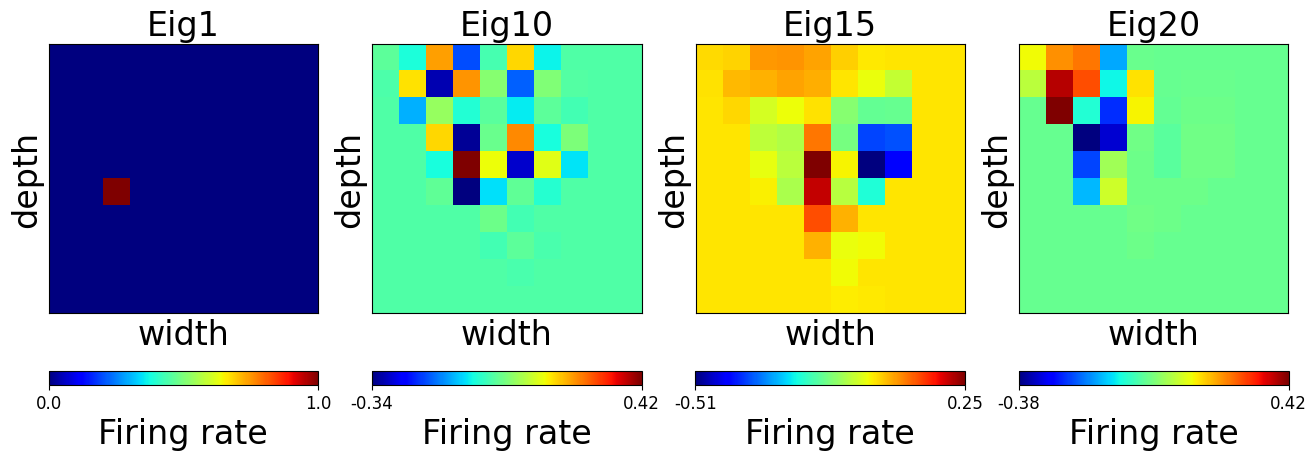

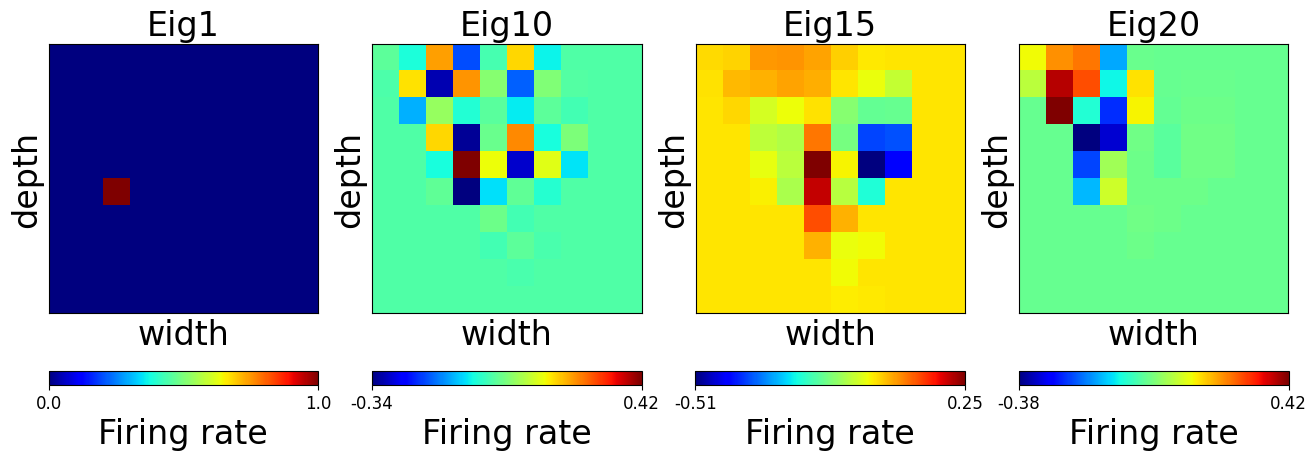

In [34]:
# Then do TD runs with the new external parameters
sr_td = sr_agent.update_successor_rep_td_full(10,20) # Compute the successor representation matrix using TD learning
sr_agent.plot_eigen(sr_agent.srmat_full_td, eigen=[1,10,15,20],save_path=None)
sr_agent.plot_eigen(sr_td, eigen=[1,10,15,20],save_path=None)



  0%|          | 0/10 [00:00<?, ?it/s]

hello


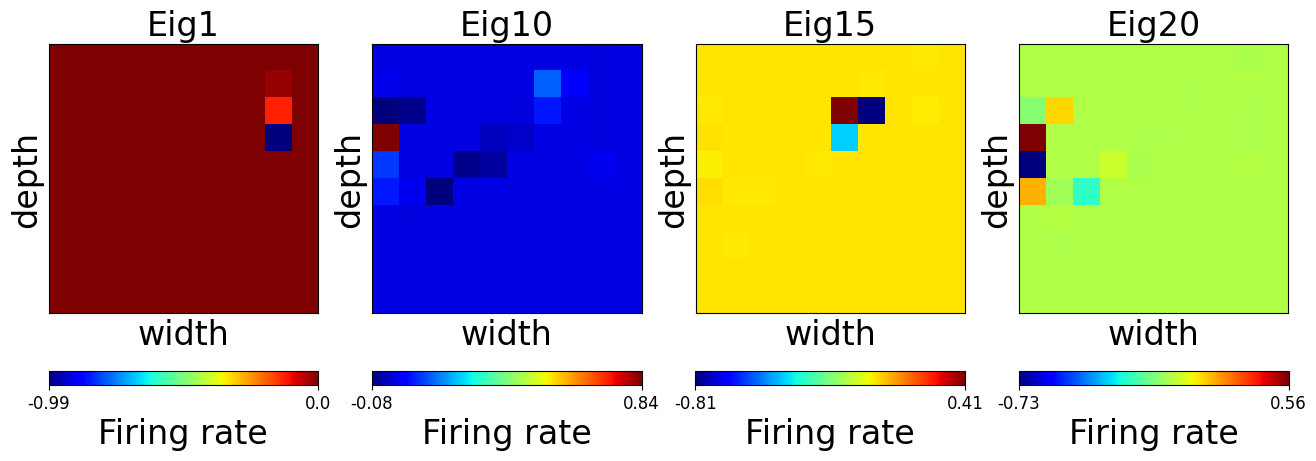

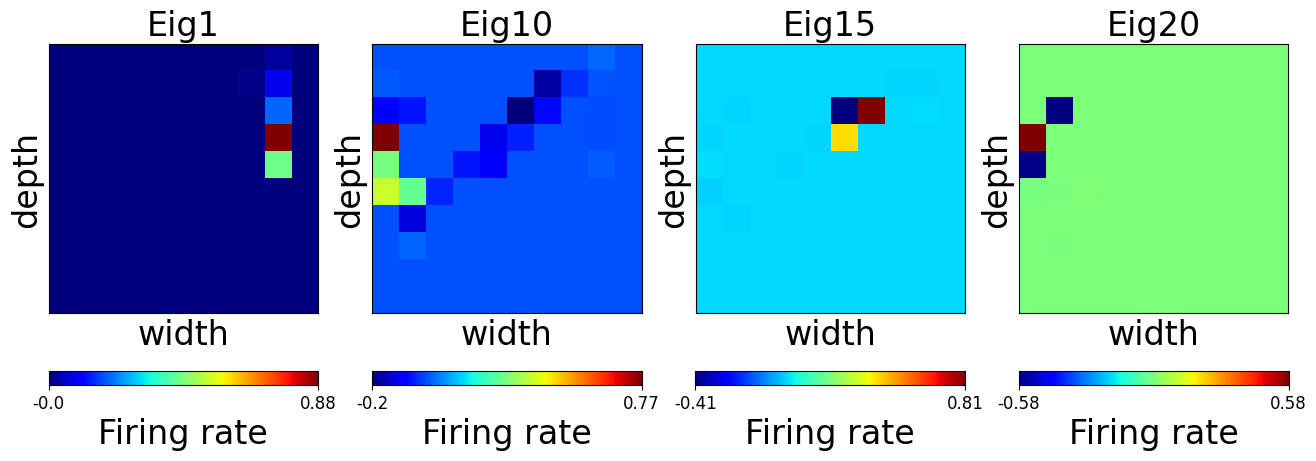

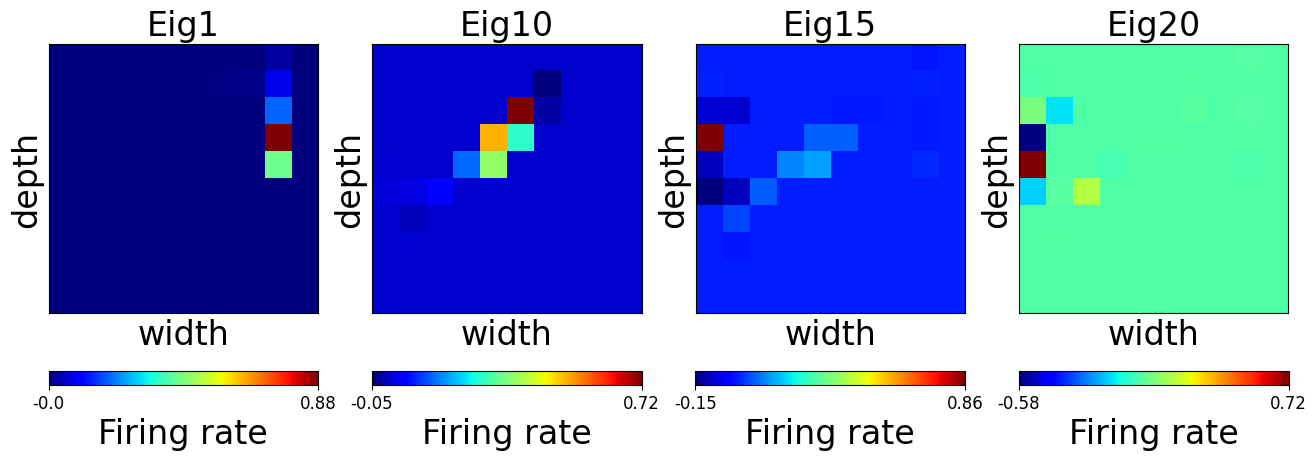

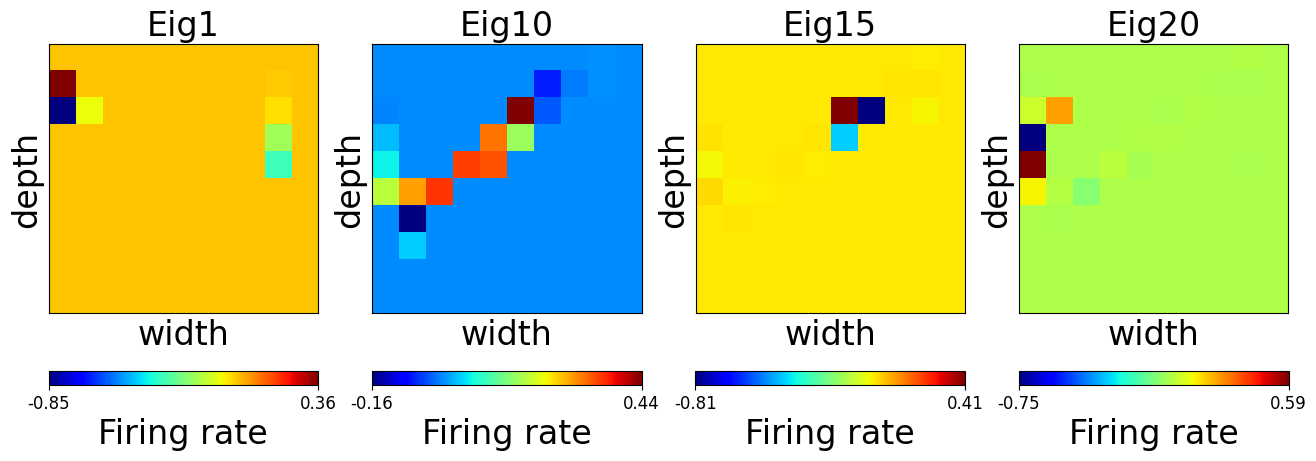

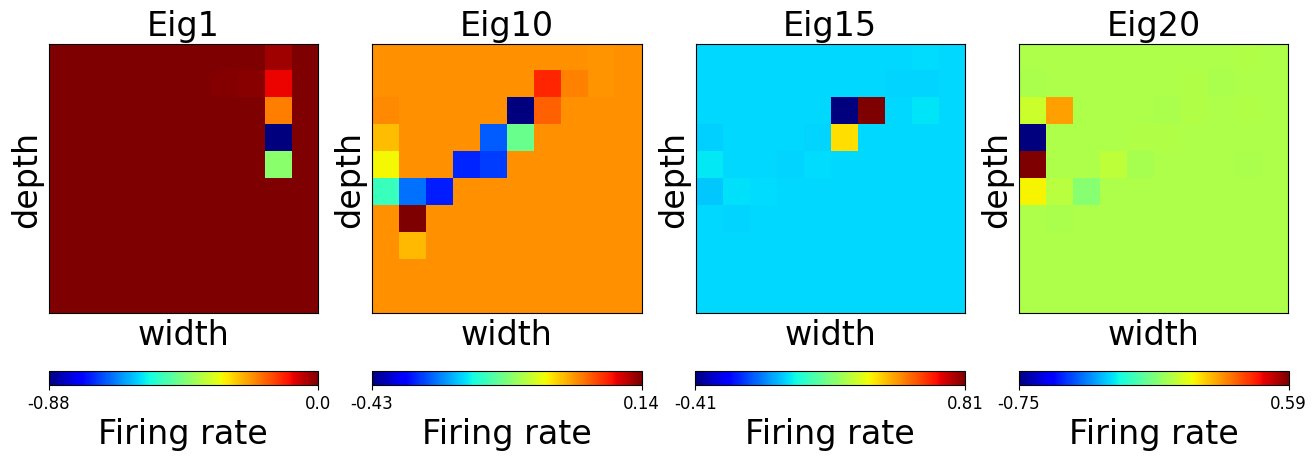

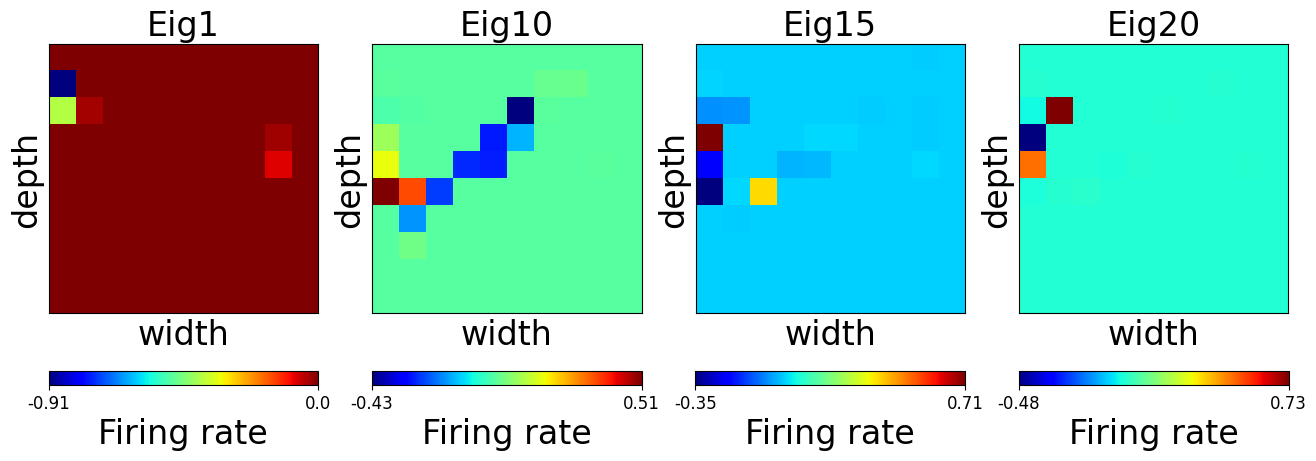

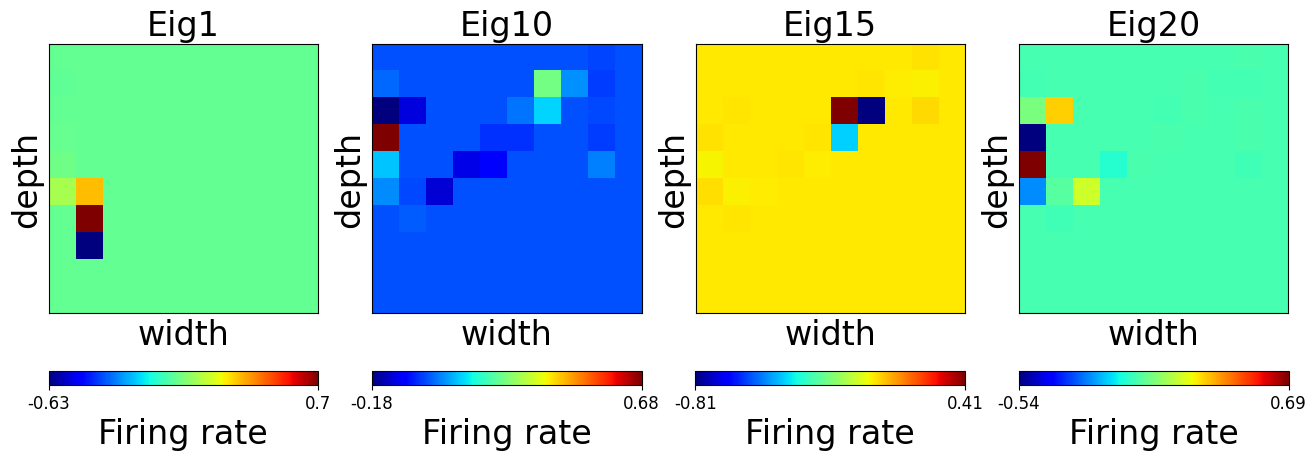

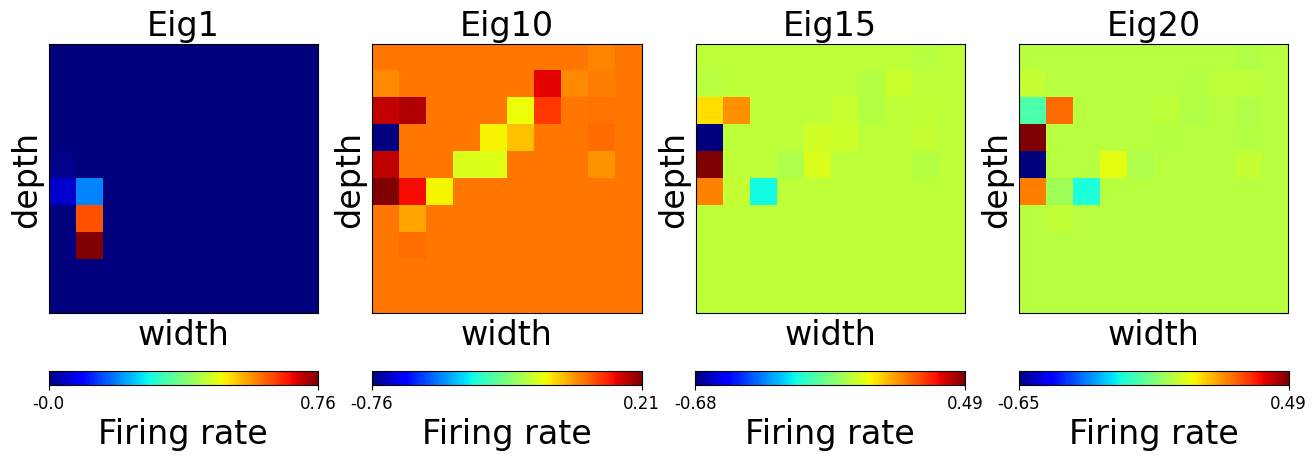

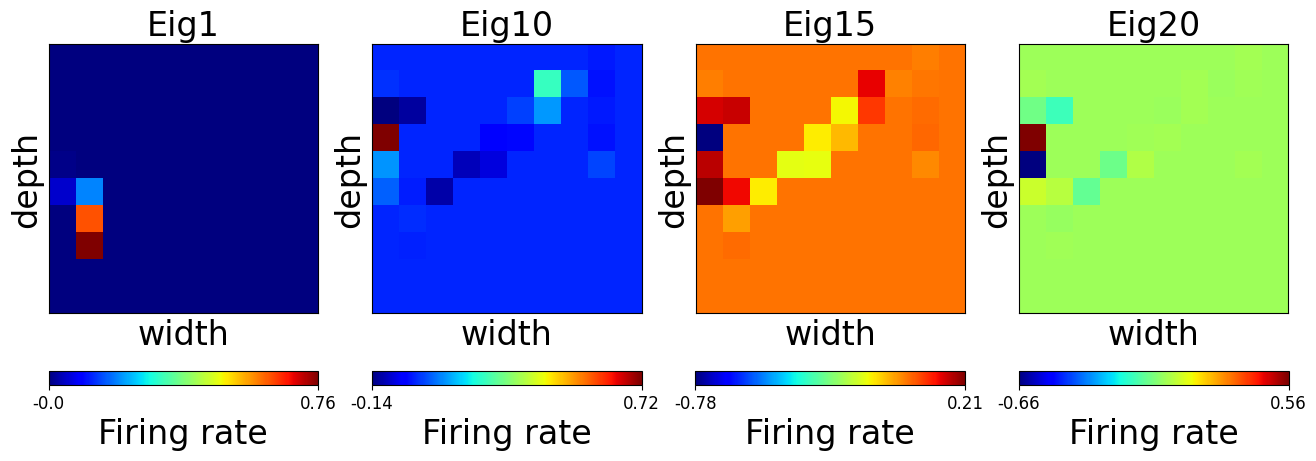

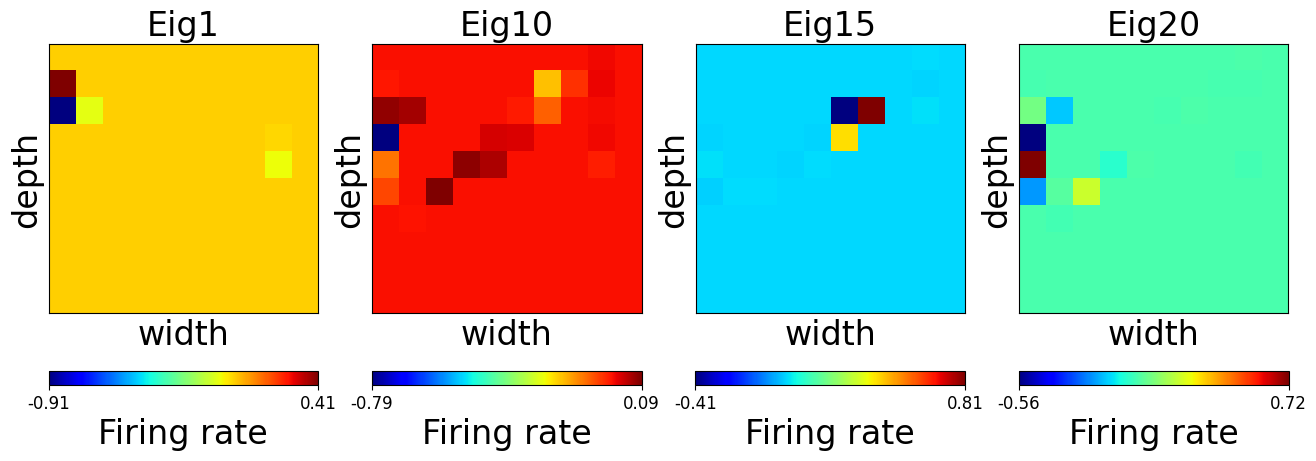

In [35]:
# etc etc
env = pd.read_pickle(arena_path)

# Now re-run in this loop fasion
plot_every = 10
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
for i in tqdm(range(param['training_loop_params']['n_episode'])):
    for j in range(param['training_loop_params']['t_episode']):
        action = sr_agent.act(obs)  # the action is link to density of state to make sure we always land in a new
        K  = sr_agent.update()
        obs, state, reward = env.step(action)
        obs = obs[:2]
        total_iters += 1
        if total_iters % plot_every == 0:
            sr_agent.plot_eigen(K, eigen=[1,10,15,20],save_path='./sr.png')


In [36]:
env.show_data()

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


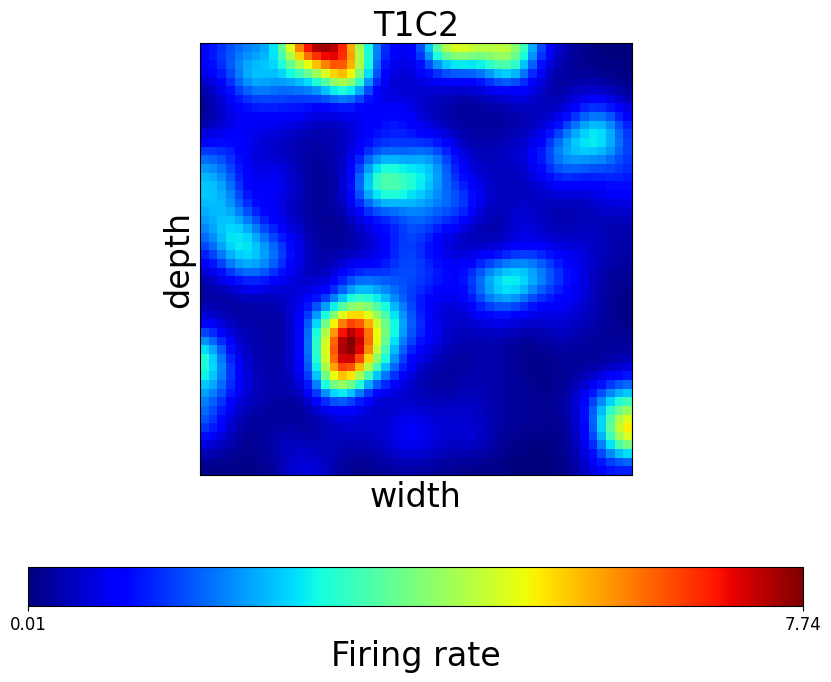

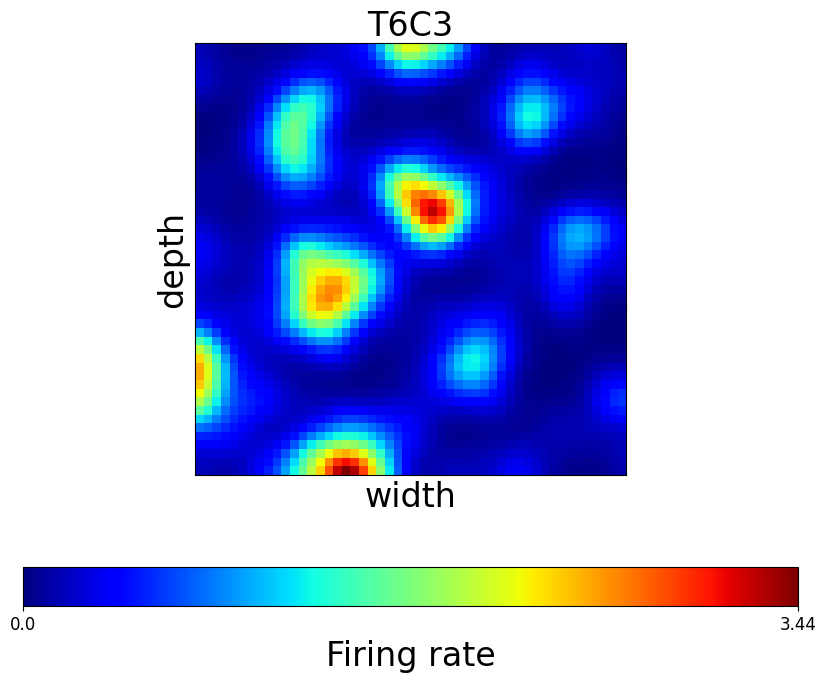

In [37]:
list_of_cells = env.plot_recording_tetr(recording_index = [2, 4], tetrode_id = ["T1C2", "T6C3"])

# Train Weber on a Simple2D env


array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

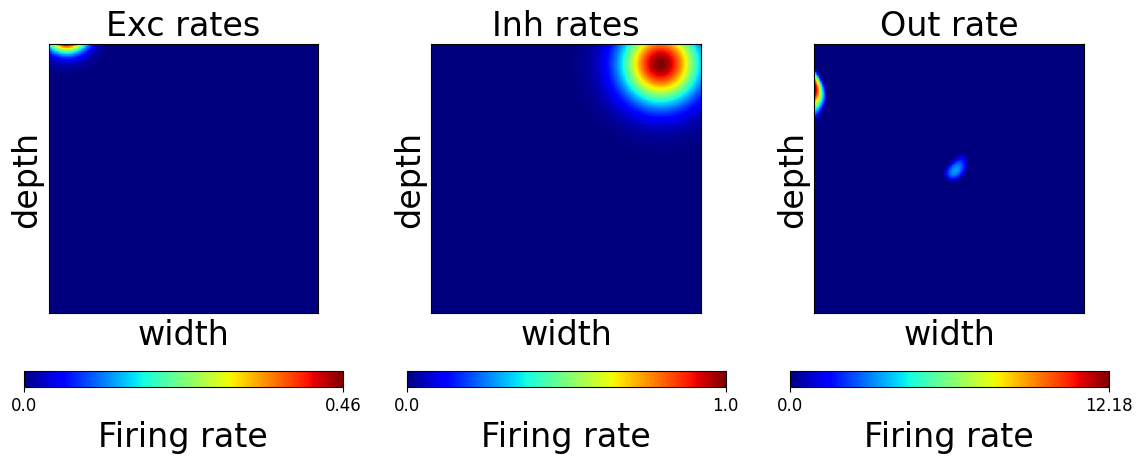

In [38]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_11-07-2023_18-28-30-341/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_11-07-2023_18-28-30-341/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_11-07-2023_18-28-30-341/arena"
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)
agent.plot_rates()

# Train Weber on a Wernel2018 env


array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

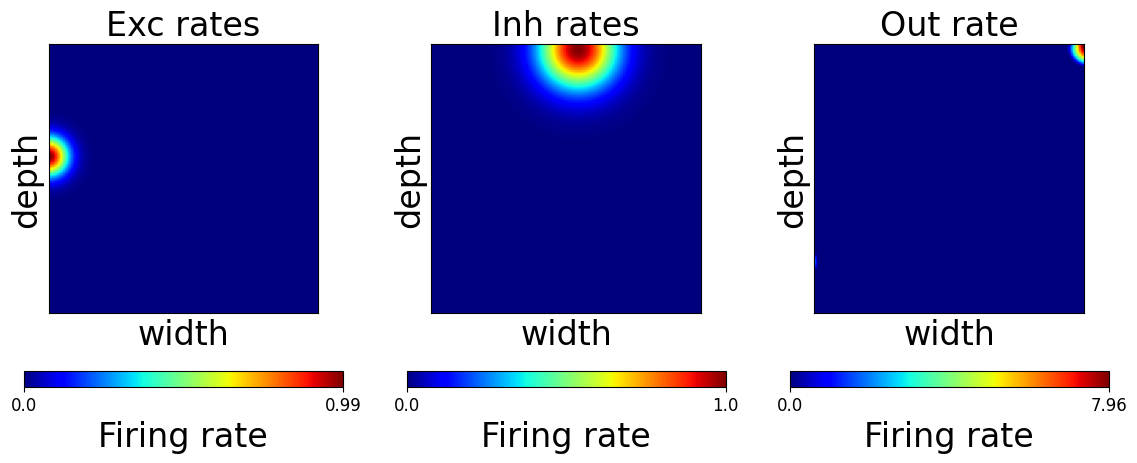

In [58]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_11-07-2023_19-25-42-466/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_11-07-2023_19-25-42-466/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_11-07-2023_19-25-42-466/arena"
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)
agent.plot_rates()



In [41]:
recording_list = env.show_data(full_dataframe=False)

Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


([array([[7.43368984e-01, 8.14034847e-01, 9.46120828e-01, ...,
          3.48277553e-04, 1.95724404e-04, 1.27682702e-04],
         [7.62586198e-01, 8.38029986e-01, 9.80281409e-01, ...,
          5.91024038e-04, 3.37095633e-04, 2.22125130e-04],
         [7.96311147e-01, 8.80682681e-01, 1.04197028e+00, ...,
          1.17188432e-03, 6.76736285e-04, 4.49861698e-04],
         ...,
         [7.93392532e-03, 1.31408344e-02, 2.50779839e-02, ...,
          8.35492107e-05, 2.97787932e-05, 1.26720439e-05],
         [7.38127697e-03, 1.22043161e-02, 2.32395399e-02, ...,
          8.28876644e-05, 2.83238159e-05, 1.11848174e-05],
         [7.02049931e-03, 1.15968558e-02, 2.20563019e-02, ...,
          8.35525043e-05, 2.82139496e-05, 1.08786646e-05]]),
  array([[9.69601271e-02, 1.05644130e-01, 1.23202196e-01, ...,
          8.20830146e-05, 5.18458067e-05, 3.70317696e-05],
         [1.20555877e-01, 1.31870431e-01, 1.54586375e-01, ...,
          1.62772852e-04, 1.02776008e-04, 7.33919103e-05],
        

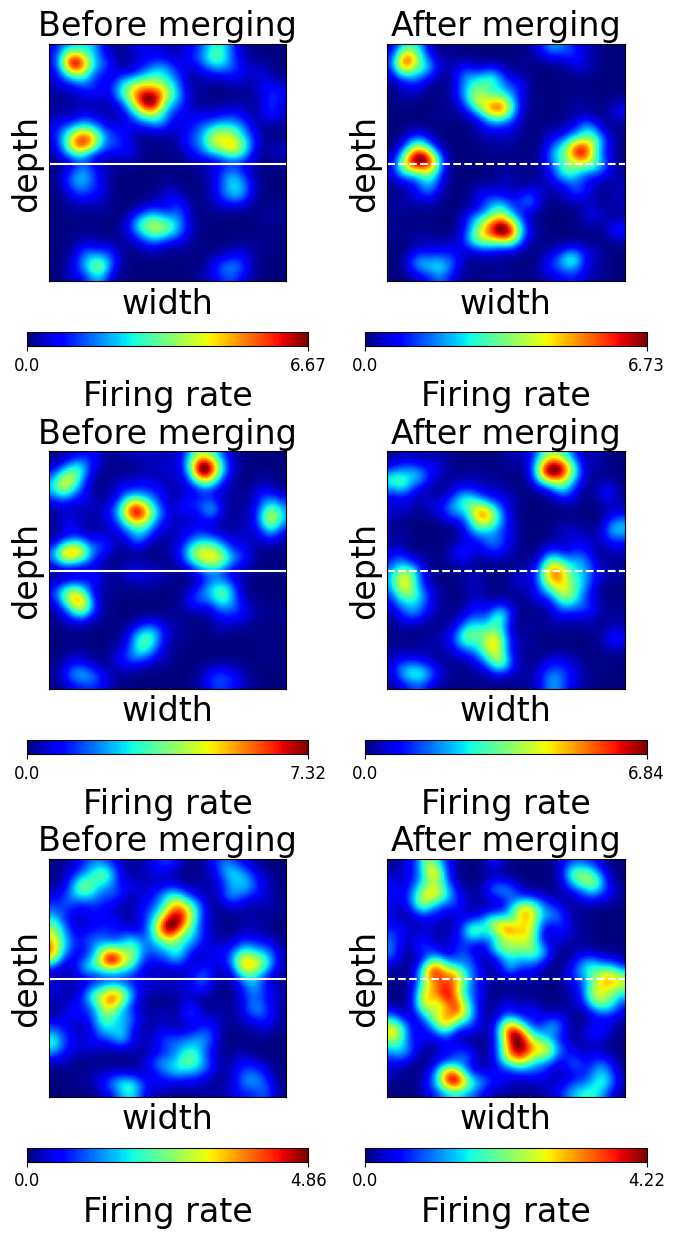

In [46]:
env.experiment.plot_merging_comparison(session_index=(125, 126, 127))

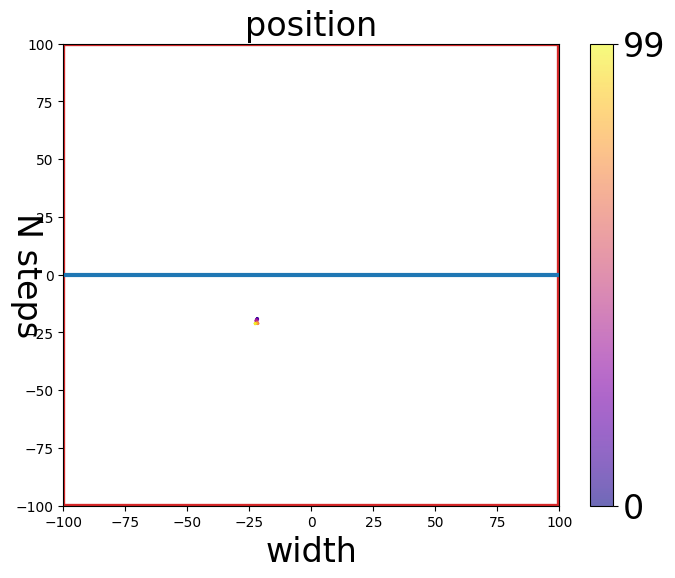

In [47]:
# Note that the wall is already removed from the arena structure
ax = env.plot_trajectory()

# Hafting-like environment

Here we train the Weber model on a linear track resembling hafting2008 experiment.

array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

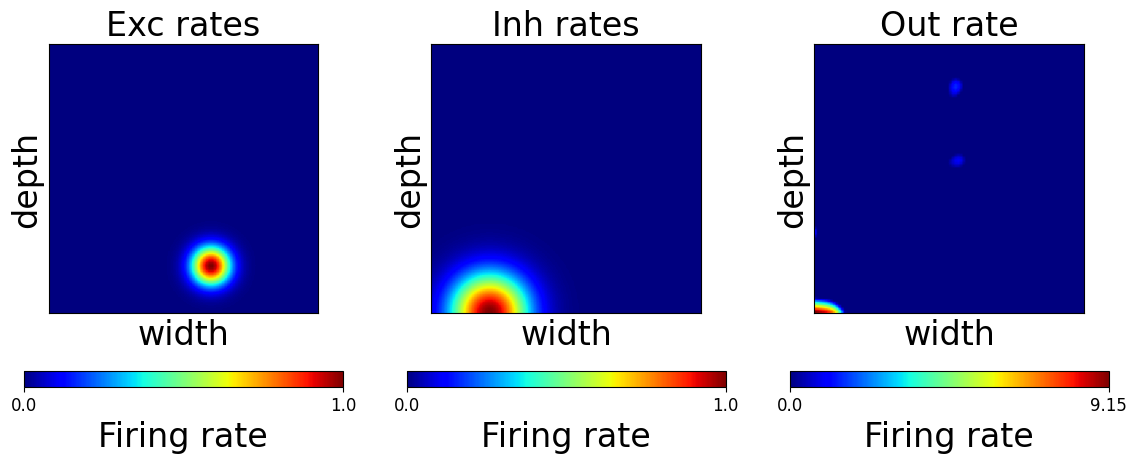

In [56]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_0_11-07-2023_20-02-33-173/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_0_11-07-2023_20-02-33-173/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_0_11-07-2023_20-02-33-173/arena"
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)
agent.plot_rates()

Interestingly, initializing the weights randomly already shows patterns that resemble real data (at least visually, we need to implement ways to compare results in a rigurous way). Here we show some of these firing rates from recordings.

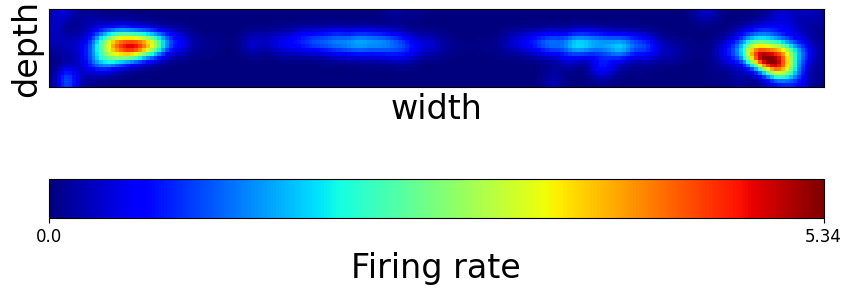

In [53]:
hafting_data = Hafting2008Data(verbose=False)
rate_map, x_bin, y_bin = hafting_data.plot_recording_tetr(recording_index=0)

# Merging Room environment


array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

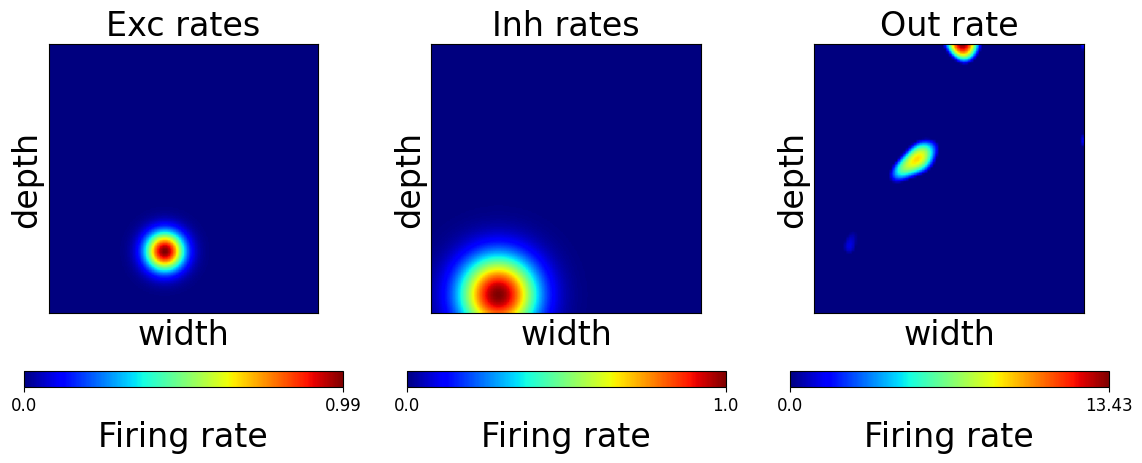

In [60]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_0_11-07-2023_20-19-19-305/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_0_11-07-2023_20-19-19-305/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_0_11-07-2023_20-19-19-305/arena"
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)
agent.plot_rates()



array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

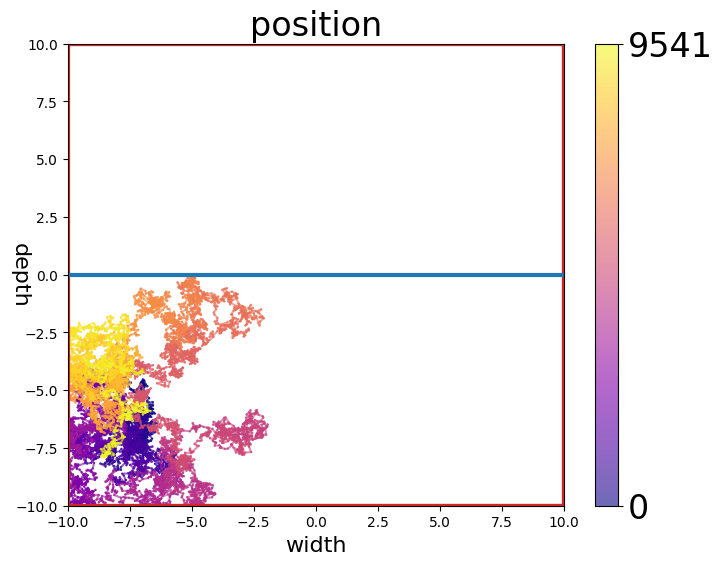

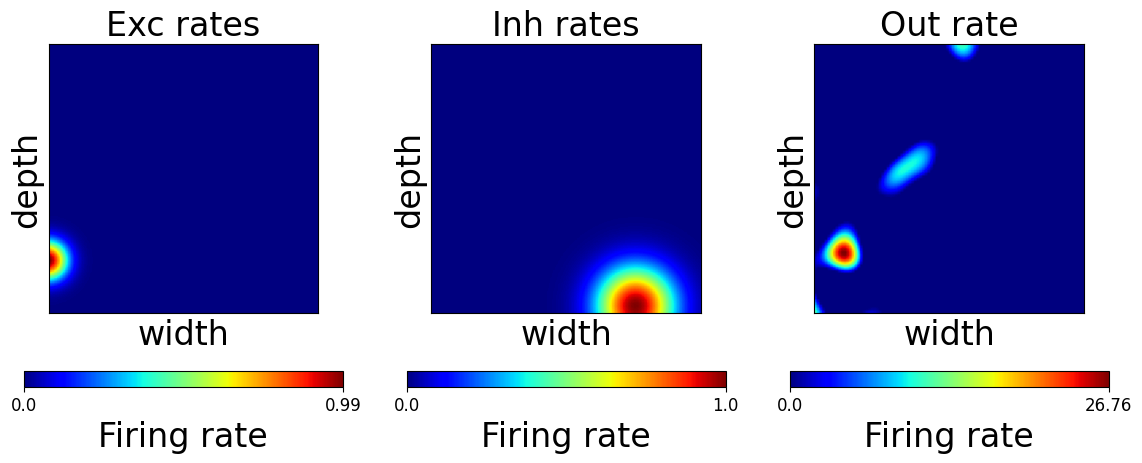

In [65]:
ax = env.plot_trajectory()
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
agent.plot_rates()